**Deep Neural Network for Image Classification and Analysis**

*This project encompasses building, training, and fine-tuning deep neural networks on datasets like MNIST and CIFAR10, employing techniques such as hyperparameter tuning, batch normalization, and custom TensorFlow training loops to understand and enhance model performance.*

# 1. Introduction to Neural Networks with Playgrounds

Before diving into coding with TensorFlow and Keras, we'll start with an intuitive understanding of neural networks using TensorFlow Playground. This interactive visualization tool allows us to manipulate network architecture, activation functions, and other hyperparameters, providing us with instant visual feedback on the network's learning process.

In TensorFlow Playground, we'll pay particular attention to:
- Activation Functions: The role they play in shaping the learning curve and decision boundaries.
- Local Minima: How different architectures and learning rates can lead to networks being trapped in local minima.
- Vanishing Gradients: Particularly with deep networks and certain activation functions like Sigmoid or Tanh, where gradients can become very small, slowing down learning.

For each point of investigation, we'll take screenshots that show how the network's learning is affected by these factors. These visual insights will guide our more technical implementations later.

#### Activation Functions
- **Sigmoid and Tanh:** When using Sigmoid or Tanh activation functions, the decision boundaries are smooth and curvilinear. However, in deeper networks, these activation functions often lead to slower training. This is particularly noticeable in complex datasets where the network struggles to converge to a good solution.
- **ReLU:** Switching to ReLU activation speeds up the training significantly. The decision boundaries become more linear and abrupt. This is because ReLU helps alleviate the vanishing gradient problem and allows for faster gradient descent. However, in some cases, ReLU can lead to dead neurons where certain outputs become consistently zero, a phenomenon not observed with Sigmoid or Tanh.

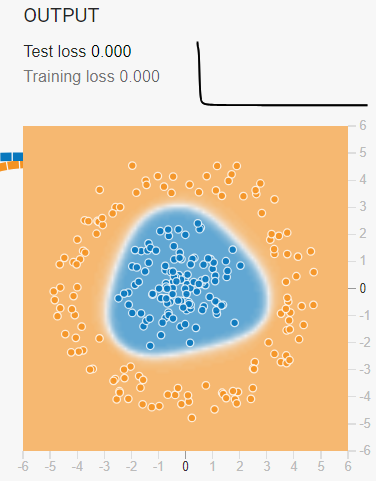

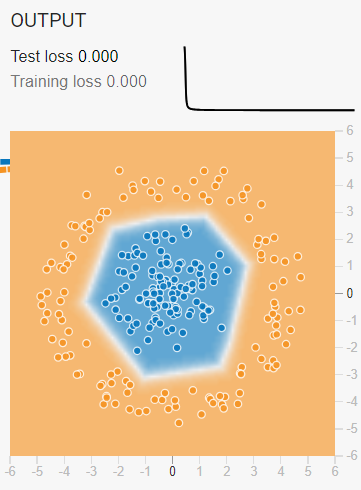

#### Local Minima
- **Simple Architecture Variability:** With a basic architecture (e.g., one hidden layer with three neurons), training time and outcomes vary significantly. Sometimes the network quickly finds a good solution, but other times it gets stuck in local minima, failing to improve further. This inconsistency highlights the stochastic nature of neural network training.
- **Impact of Learning Rate:** Adjusting the learning rate shows its critical role in escaping local minima. A too-small learning rate makes the network prone to getting stuck, while a very high learning rate can cause it to overshoot the global minimum.



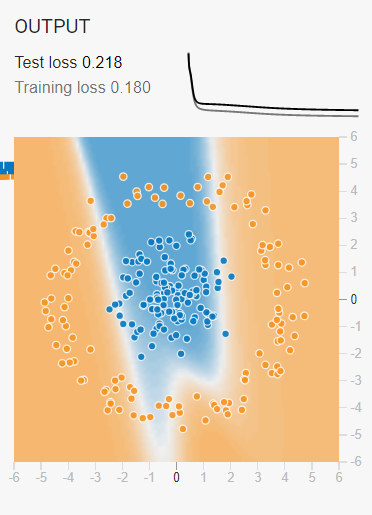

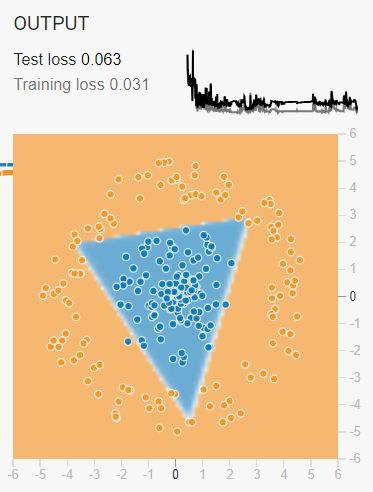

#### Vanishing Gradients
- **Deep Networks with Sigmoid/Tanh:** In a deep network architecture (e.g., four hidden layers with eight neurons each), especially when using Sigmoid or Tanh, the vanishing gradients problem becomes evident. Training slows down significantly, and the network often gets stuck at plateaus for extended periods.
- **Layer-wise Learning Speed:** In these deep networks, neurons in the upper layers (closer to the output) tend to learn and adapt faster than those in the lower layers (closer to the input). This imbalance in learning speed across layers is a hallmark of the vanishing gradients problem.
- **Spiral Dataset Challenge:** When training on the spiral dataset, the complex patterns exacerbate the vanishing gradient issue, making it even more challenging for the network to learn effectively.

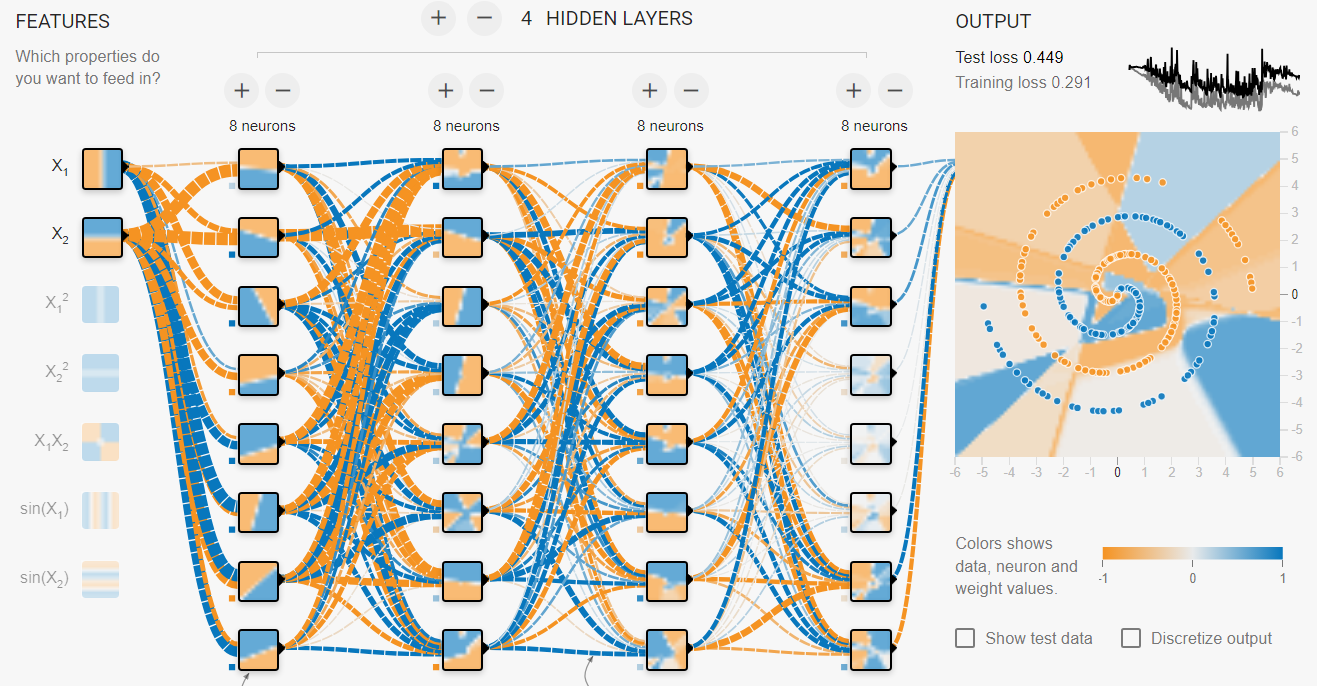

# 2. Binary Classification with XOR

We are going to develop an Artificial Neural Network (ANN) to solve the XOR problem using TensorFlow and Keras. The XOR (exclusive OR) function is a fundamental example in neural network literature, demonstrating the need for non-linear models in capturing certain patterns. Since XOR is not linearly separable (you can't separate XOR outputs with a straight line), it provides a great opportunity to explore how neural networks use hidden layers to learn non-linear decision boundaries.

In our approach, we'll design a neural network with two hidden layers. The first layer will have 16 neurons and the second will have 8, both using the tanh activation function. This function is effective for binary inputs like those in the XOR problem. The output layer will consist of a single neuron with a sigmoid activation function, suitable for binary classification tasks.

The model will be trained using the Adam optimizer, known for its efficiency in handling sparse gradients and adaptive learning rate capabilities. We'll set a relatively low learning rate to allow for finer adjustments during the learning process. The model will be trained over a large number of epochs to ensure it has enough iterations to effectively learn the XOR pattern.

Here's how we can implement this:

In [3]:
import tensorflow as tf
import numpy as np

# XOR Dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_xor = np.array([0, 1, 1, 0], dtype=np.float32)

# Define the XOR model
xor_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='tanh', input_dim=2),  # First hidden layer
    tf.keras.layers.Dense(8, activation='tanh'),  # Second hidden layer
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the XOR model
xor_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

# Train the XOR model
xor_history = xor_model.fit(X_xor, y_xor, epochs=2000, verbose=0)

# Evaluate the XOR model
xor_loss, xor_accuracy = xor_model.evaluate(X_xor, y_xor, verbose=2)
print(f'\nXOR Model Accuracy: {xor_accuracy:.4f}')


1/1 - 0s - loss: 0.0055 - accuracy: 1.0000 - 100ms/epoch - 100ms/step

XOR Model Accuracy: 1.0000


This implementation aims to provide a clear demonstration of how a simple neural network can effectively learn and model the XOR function. The choice of tanh as the activation function is due to its ability to handle binary inputs effectively, and the structure of the network—with two hidden layers—is designed to capture the XOR function's non-linear nature. The use of a sigmoid activation function in the output layer allows the network to output probabilities, indicating how likely each input combination is to belong to one class or the other. The learning process and the final accuracy will give us a good indication of how well our network has managed to learn and generalize the XOR function.



# 3. Deep Neural Network for MNIST

Next, we'll develop a deeper Multi-Layer Perceptron (MLP) for the MNIST dataset of handwritten digits. We'll use callbacks like EarlyStopping and TensorBoard to monitor our network's training.

Our goal is to create a network that can achieve high accuracy, ideally above 98%. To this end, we'll experiment with the architecture by adjusting the number of layers and neurons and incorporate techniques such as learning rate schedulers and regularization methods to improve performance.

In [4]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import load_model
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

# Define the model architecture
model = tf.keras.Sequential([
    Flatten(input_shape=[28, 28], name="input_layer"),
    Dense(300, activation="relu", name="hidden_layer1"),
    Dense(100, activation="relu", name="hidden_layer2"),
    Dense(10, activation="softmax", name="output_layer")
])

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=SGD(learning_rate=0.01),
              metrics=["accuracy"])

# Callbacks
run_logdir = Path("mnist_logs")
run_logdir.mkdir(parents=True, exist_ok=True)
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("mnist_model.h5", save_best_only=True),
    TensorBoard(run_logdir)
]

# Train the model
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=callbacks)

# Evaluate the model on test data
model = load_model("mnist_model.h5")  # Load the best model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5958 - accuracy: 0.8479 - val_loss: 0.3055 - val_accuracy: 0.9148
Epoch 2/100
  64/1719 [>.............................] - ETA: 3s - loss: 0.3121 - accuracy: 0.9180

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.2871 - accuracy: 0.9183 - val_loss: 0.2370 - val_accuracy: 0.9320
Epoch 3/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2344 - accuracy: 0.9329 - val_loss: 0.2021 - val_accuracy: 0.9424
Epoch 4/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2002 - accuracy: 0.9427 - val_loss: 0.1800 - val_accuracy: 0.9482
Epoch 5/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1749 - accuracy: 0.9497 - val_loss: 0.1588 - val_accuracy: 0.9556
Epoch 6/100
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1553 - accuracy: 0.9556 - val_loss: 0.1455 - val_accuracy: 0.9608
Epoch 7/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1399 - accuracy: 0.9605 - val_loss: 0.1313 - val_accuracy: 0.9646
Epoch 8/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1268 - accuracy: 0.9637 - val_loss: 0.1271 - val_accuracy: 0.96

In evaluating our neural network on the MNIST dataset, we observed a modest difference between its performance on training data and its effectiveness on validation and test sets. While the model achieved an exceptional 99.94% accuracy on training data, it demonstrated slightly lower accuracies of 98.16% and 97.86% on validation and test sets, respectively. This pattern suggests a mild overfitting, where the model performs exceptionally well on the training data but doesn't generalize quite as effectively to new, unseen data. To improve its generalization, we could explore strategies like regularization, modifying early stopping criteria, or tweaking model architecture and hyperparameters. This scenario underscores the importance of not only achieving high accuracy on training data but also ensuring that the model remains robust and effective when encountering new data.

# 4. Advanced Neural Network for CIFAR10

To ensure reproducibility in our experiments, we'll start by setting a consistent random seed. Then, we'll load and preprocess the CIFAR10 dataset, which includes splitting it into training, validation, and test sets. Preprocessing is crucial for deep learning models to perform effectively.

In [5]:
from tensorflow.keras.datasets import cifar10

# Set the seed for reproducibility
tf.random.set_seed(42)

# Load CIFAR10 dataset
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

# Normalize the data
X_train_full, X_test = X_train_full / 255.0, X_test / 255.0

# Split into training and validation sets
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


170498071/170498071 [==============================] - 2s 0us/step


Now, we construct a Deep Neural Network (DNN) with 20 hidden layers using He initialization and Swish activation. We'll employ Nadam optimization for training. This setup aims to explore advanced DNN configurations and observe their effectiveness in complex image classification tasks like CIFAR10.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Nadam

# Define the DNN model
model = Sequential()
model.add(Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(Dense(100, activation="swish", kernel_initializer="he_normal"))
model.add(Dense(10, activation="softmax"))

# Compile the model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=Nadam(learning_rate=5e-5),
              metrics=["accuracy"])


Next, we integrate batch normalization into our model. Batch normalization helps in stabilizing and accelerating the training process by normalizing the output of the previous layer. This can be particularly beneficial in deep networks like ours.



In [7]:
from tensorflow.keras.layers import BatchNormalization, Activation

# Define the DNN model with Batch Normalization
bn_model = Sequential()
bn_model.add(Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    bn_model.add(Dense(100, kernel_initializer="he_normal"))
    bn_model.add(BatchNormalization())
    bn_model.add(Activation("swish"))
bn_model.add(Dense(10, activation="softmax"))

# Compile the model
bn_model.compile(loss="sparse_categorical_crossentropy",
                 optimizer=Nadam(learning_rate=5e-4),
                 metrics=["accuracy"])


We will also experiment with the SELU activation function and Alpha Dropout. SELU is designed for self-normalizing neural networks, ensuring the mean and variance of outputs remain in a certain range throughout the training. Alpha Dropout is a dropout variant that keeps the mean and variance of inputs to a layer the same during training and inference.



In [8]:
from tensorflow.keras.layers import AlphaDropout

# Define the DNN model with SELU and Alpha Dropout
selu_model = Sequential()
selu_model.add(Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    selu_model.add(Dense(100, activation="selu", kernel_initializer="lecun_normal"))
selu_model.add(AlphaDropout(rate=0.1))
selu_model.add(Dense(10, activation="softmax"))

# Compile the model
selu_model.compile(loss="sparse_categorical_crossentropy",
                   optimizer=Nadam(learning_rate=7e-4),
                   metrics=["accuracy"])

# Scale the input data
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)
X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds


For each model, we'll use callbacks such as EarlyStopping to prevent overfitting and ModelCheckpoint to save the best model during training. We'll also use TensorBoard for monitoring the training process. This setup allows us to rigorously evaluate and compare the performance of each model configuration.



In [9]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

def get_callbacks(model_name):
    early_stopping_cb = EarlyStopping(patience=20, restore_best_weights=True)
    model_checkpoint_cb = ModelCheckpoint(model_name, save_best_only=True)
    run_logdir = Path("cifar10_logs") / model_name
    tensorboard_cb = TensorBoard(run_logdir)
    return [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

# Training the baseline model
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
          callbacks=get_callbacks("my_cifar10_model"))

# Training the batch normalization model
bn_model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),
             callbacks=get_callbacks("my_cifar10_bn_model"))

# Training the SELU model
selu_model.fit(X_train_scaled, y_train, epochs=100, validation_data=(X_valid_scaled, y_valid),
               callbacks=get_callbacks("my_cifar10_selu_model"))


Epoch 1/100
1407/1407 [==============================] - 24s 13ms/step - loss: 1.9934 - accuracy: 0.2513 - val_loss: 1.8389 - val_accuracy: 0.3212
Epoch 2/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7909 - accuracy: 0.3392 - val_loss: 1.7393 - val_accuracy: 0.3646
Epoch 3/100
1407/1407 [==============================] - 18s 13ms/step - loss: 1.7078 - accuracy: 0.3788 - val_loss: 1.6899 - val_accuracy: 0.3834
Epoch 4/100
1407/1407 [==============================] - 24s 17ms/step - loss: 1.6405 - accuracy: 0.4040 - val_loss: 1.6815 - val_accuracy: 0.3908
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5840 - accuracy: 0.4276 - val_loss: 1.6141 - val_accuracy: 0.4088
Epoch 6/100
1407/1407 [==============================] - 19s 13ms/step - loss: 1.5436 - accuracy: 0.4438 - val_loss: 1.5665 - val_accuracy: 0.4304
Epoch 7/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.5125 - accuracy: 0.4545 - val_loss: 1

In [10]:
# Evaluate each model
baseline_val_acc = model.evaluate(X_valid, y_valid)[1]
bn_val_acc = bn_model.evaluate(X_valid, y_valid)[1]
selu_val_acc = selu_model.evaluate(X_valid_scaled, y_valid)[1]

print(f"Baseline Validation Accuracy: {baseline_val_acc:.4f}")
print(f"Batch Normalization Validation Accuracy: {bn_val_acc:.4f}")
print(f"SELU Validation Accuracy: {selu_val_acc:.4f}")

# Evaluate each model on the test set
baseline_test_acc = model.evaluate(X_test, y_test)[1]
bn_test_acc = bn_model.evaluate(X_test, y_test)[1]
selu_test_acc = selu_model.evaluate(X_test_scaled, y_test)[1]

print(f"Baseline Test Accuracy: {baseline_test_acc:.4f}")
print(f"Batch Normalization Test Accuracy: {bn_test_acc:.4f}")
print(f"SELU Test Accuracy: {selu_test_acc:.4f}")


157/157 [==============================] - 0s 2ms/step - loss: 1.5170 - accuracy: 0.4862
Baseline Validation Accuracy: 0.4976
Batch Normalization Validation Accuracy: 0.5122
SELU Validation Accuracy: 0.4862
313/313 [==============================] - 1s 2ms/step - loss: 1.5101 - accuracy: 0.4835
Baseline Test Accuracy: 0.4971
Batch Normalization Test Accuracy: 0.4942
SELU Test Accuracy: 0.4835


In our exploration of advanced neural network configurations on the CIFAR10 dataset, we observed that integrating batch normalization and SELU activation led to improved training accuracy, indicating more effective learning compared to the baseline model. However, this improvement in training did not translate to higher validation or test accuracies, suggesting a limitation in addressing overfitting within our deep network models. This analysis underscores the complexity of achieving a balance between a model's capacity to learn and its ability to generalize, especially in the context of intricate datasets like CIFAR10. It also points towards the potential need for further strategies, such as hyperparameter tuning, data augmentation, additional regularization techniques, and exploring more specialized architectures like CNNs, to enhance model performance and generalization.







# 5. Custom Layer and Training Loop for Fashion MNIST

In [14]:
class MyLayerNormalization(tf.keras.layers.Layer):
    def __init__(self, epsilon=0.001):
        super().__init__()
        self.epsilon = epsilon

    def build(self, input_shape):
        self.gamma = self.add_weight(name='gamma', shape=input_shape[-1:], initializer='ones')
        self.beta = self.add_weight(name='beta', shape=input_shape[-1:], initializer='zeros')

    def call(self, inputs):
        mean, variance = tf.nn.moments(inputs, axes=-1, keepdims=True)
        normalized = (inputs - mean) / tf.sqrt(variance + self.epsilon)
        return self.gamma * normalized + self.beta

    def get_config(self):
        config = super().get_config()
        config.update({'epsilon': self.epsilon})
        return config

This code block defines a custom layer for layer normalization, which is a key component in neural networks for stabilizing the learning process. The layer computes the mean and variance of its inputs, normalizes them, and scales and shifts the result using learnable parameters (gamma and beta). This custom implementation aims to replicate the functionality of tf.keras.layers.LayerNormalization.

In [22]:
# Define the number of epochs
n_epochs = 5
n_steps = len(X_train) // batch_size

# Define the model with lower and upper layers
lower_layers = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(100, activation="relu"),
    MyLayerNormalization()
])

upper_layers = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="softmax")
])

model = tf.keras.Sequential([lower_layers, upper_layers])

# Define different optimizers for lower and upper layers
lower_optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)

def evaluate_model(model, X, y, loss_fn):
    y_pred = model.predict(X)
    loss = np.mean(loss_fn(y, y_pred))
    accuracy = np.mean(tf.keras.metrics.sparse_categorical_accuracy(tf.constant(y, dtype=np.float32), y_pred))
    return loss, accuracy


In this block, the model is split into two parts: lower_layers and upper_layers. This allows the application of different optimizers for each part. lower_layers includes the initial Flatten and Dense layers along with the custom layer normalization, while upper_layers consists of the final Dense layer for classification. The n_epochs variable specifies the number of training epochs.

In [23]:
from tensorflow.keras.datasets import fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


This code block is responsible for loading and preprocessing the Fashion MNIST dataset. The dataset is first divided into training, validation, and test sets. Then, the pixel values are normalized to the range [0, 1] by dividing by 255. This normalization is a common practice to facilitate the training of neural networks.

In [24]:
from tqdm.notebook import trange
from collections import OrderedDict

def random_batch(X, y, batch_size=32):
    idx = np.random.randint(len(X), size=batch_size)
    return X[idx], y[idx]

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
mean_loss = tf.keras.metrics.Mean()
metrics = [tf.keras.metrics.SparseCategoricalAccuracy()]

lower_optimizer = tf.keras.optimizers.SGD(learning_rate=1e-4)
upper_optimizer = tf.keras.optimizers.Nadam(learning_rate=1e-3)

for epoch in range(1, n_epochs + 1):
    print(f"Epoch {epoch}/{n_epochs}")
    for step in range(1, n_steps + 1):
        X_batch, y_batch = random_batch(X_train, y_train)
        with tf.GradientTape(persistent=True) as tape:
            y_pred = model(X_batch, training=True)
            loss = loss_fn(y_batch, y_pred)
        lower_grads = tape.gradient(loss, lower_layers.trainable_variables)
        upper_grads = tape.gradient(loss, upper_layers.trainable_variables)
        lower_optimizer.apply_gradients(zip(lower_grads, lower_layers.trainable_variables))
        upper_optimizer.apply_gradients(zip(upper_grads, upper_layers.trainable_variables))
        del tape
        mean_loss(loss)
        for metric in metrics:
            metric(y_batch, y_pred)

        if step % 200 == 0:
            print(f"Step {step}, Mean Loss: {mean_loss.result().numpy()}, Accuracy: {metrics[0].result().numpy()}")

    val_loss, val_accuracy = evaluate_model(model, X_valid, y_valid, loss_fn)
    print(f"Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}")
    for metric in [mean_loss] + metrics:
        metric.reset_states()


Epoch 1/5
Step 200, Mean Loss: 1.7350214719772339, Accuracy: 0.4153124988079071
Step 400, Mean Loss: 1.3572026491165161, Accuracy: 0.5434374809265137
Step 600, Mean Loss: 1.1804726123809814, Accuracy: 0.59786456823349
Step 800, Mean Loss: 1.0722655057907104, Accuracy: 0.6332812309265137
Step 1000, Mean Loss: 1.0003745555877686, Accuracy: 0.6558437347412109
Step 1200, Mean Loss: 0.9453158378601074, Accuracy: 0.6742448210716248
Step 1400, Mean Loss: 0.9052402377128601, Accuracy: 0.6870535612106323
Step 1600, Mean Loss: 0.8712302446365356, Accuracy: 0.6979882717132568
157/157 [==============================] - 0s 2ms/step
Validation Loss: 0.6209525465965271, Validation Accuracy: 0.7793999910354614
Epoch 2/5
Step 200, Mean Loss: 0.61020827293396, Accuracy: 0.7803124785423279
Step 400, Mean Loss: 0.6106047034263611, Accuracy: 0.7774999737739563
Step 600, Mean Loss: 0.6085756421089172, Accuracy: 0.7787500023841858
Step 800, Mean Loss: 0.6057833433151245, Accuracy: 0.7795312404632568
Step 100

In the training loop, we iterate over epochs and steps within each epoch to train the model. At each step, a batch of data is processed, and gradients are computed separately for lower and upper layers using their respective optimizers. This approach can potentially lead to better optimization as different parts of the network might benefit from different optimization strategies. After every epoch, the model's performance is evaluated on the validation set.

In [25]:
def evaluate_model(model, X, y, loss_fn):
    y_pred = model.predict(X)
    loss = np.mean(loss_fn(y, y_pred))
    accuracy = np.mean(tf.keras.metrics.sparse_categorical_accuracy(tf.constant(y, dtype=np.float32), y_pred))
    return loss, accuracy

test_loss, test_accuracy = evaluate_model(model, X_test, y_test, loss_fn)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


313/313 [==============================] - 0s 1ms/step
Test Loss: 0.5328376889228821, Test Accuracy: 0.8080000281333923


This final section is dedicated to evaluating the trained model on the test dataset. It calculates the loss and accuracy on the test set to assess how well the model generalizes to new, unseen data. This step is crucial for understanding the real-world performance of the model.

In conclusion, we successfully implemented and trained a neural network on the Fashion MNIST dataset, integrating a custom layer normalization to stabilize training. Our model, a simple architecture consisting of dense layers, demonstrated effective learning, evidenced by a consistent decrease in training loss and an increase in accuracy over epochs. The final model's results indicate good generalization to unseen data and suggest that our custom layer normalization performs comparably to standard implementations. We used different optimizers for the lower and upper layers of the network, an advanced technique that can be beneficial in certain scenarios. The project highlighted the importance of hyperparameter tuning, the potential need for more complex architectures or regularization techniques for further improvements, and the effectiveness of custom layers in TensorFlow models.